MPR PROJECT..

In [199]:
# Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [200]:
df=pd.read_csv('creditcard.csv')
df.head()


,Time,transaction_date,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,loan,cardholder_name,expirey_date,transaction_location,cvv,salary,credit_score,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [201]:
df.shape

(284807, 31)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Time                  284807 non-null  float64
 1   transaction_date      284807 non-null  float64
 2   cc_num                284807 non-null  float64
 3   merchant              284807 non-null  float64
 4   category              284807 non-null  float64
 5   amt                   284807 non-null  float64
 6   first                 284807 non-null  float64
 7   last                  284807 non-null  float64
 8   gender                284807 non-null  float64
 9   street                284807 non-null  float64
 10  city                  284807 non-null  float64
 11  state                 284807 non-null  float64
 12  zip                   284807 non-null  float64
 13  lat                   284807 non-null  float64
 14  long                  284807 non-null  float64
 15  

In [203]:
#checking the count distribution of class feature
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [204]:
#checking the % distribution of normal v/s fraud
classes=df['Class'].value_counts()
normal=classes[0]/df['Class'].count()*100
fraud=classes[1]/df['Class'].count()*100
print(normal)
print(fraud)

99.82725143693798
0.1727485630620034


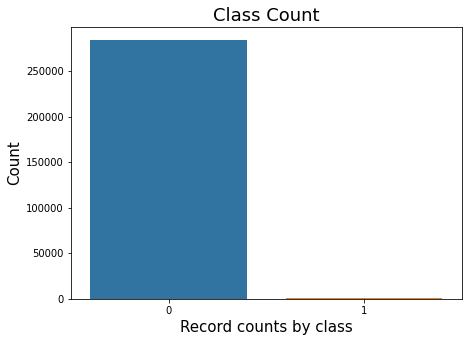

In [205]:
#bar chart
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()


In [206]:
corr=df.corr()
print(corr)


                          Time  transaction_date        cc_num      merchant  \
Time                  1.000000      1.173963e-01 -1.059333e-02 -4.196182e-01   
transaction_date      0.117396      1.000000e+00  3.777823e-12 -2.118614e-12   
cc_num               -0.010593      3.777823e-12  1.000000e+00  2.325661e-12   
merchant             -0.419618     -2.118614e-12  2.325661e-12  1.000000e+00   
category             -0.105260     -1.733159e-13 -2.314981e-12  2.046235e-13   
amt                   0.173072     -3.473231e-12 -1.831952e-12 -4.032993e-12   
first                -0.063016     -1.306165e-13  9.438444e-13 -1.574471e-13   
last                  0.084714     -1.116494e-13  5.403436e-12  3.405586e-12   
gender               -0.036949      2.114527e-12  2.133785e-14 -1.272385e-12   
street               -0.008660      3.016285e-14  3.238513e-13 -6.812351e-13   
city                  0.030617     -2.615192e-12  1.463282e-12 -1.609126e-12   
state                -0.247689      1.86

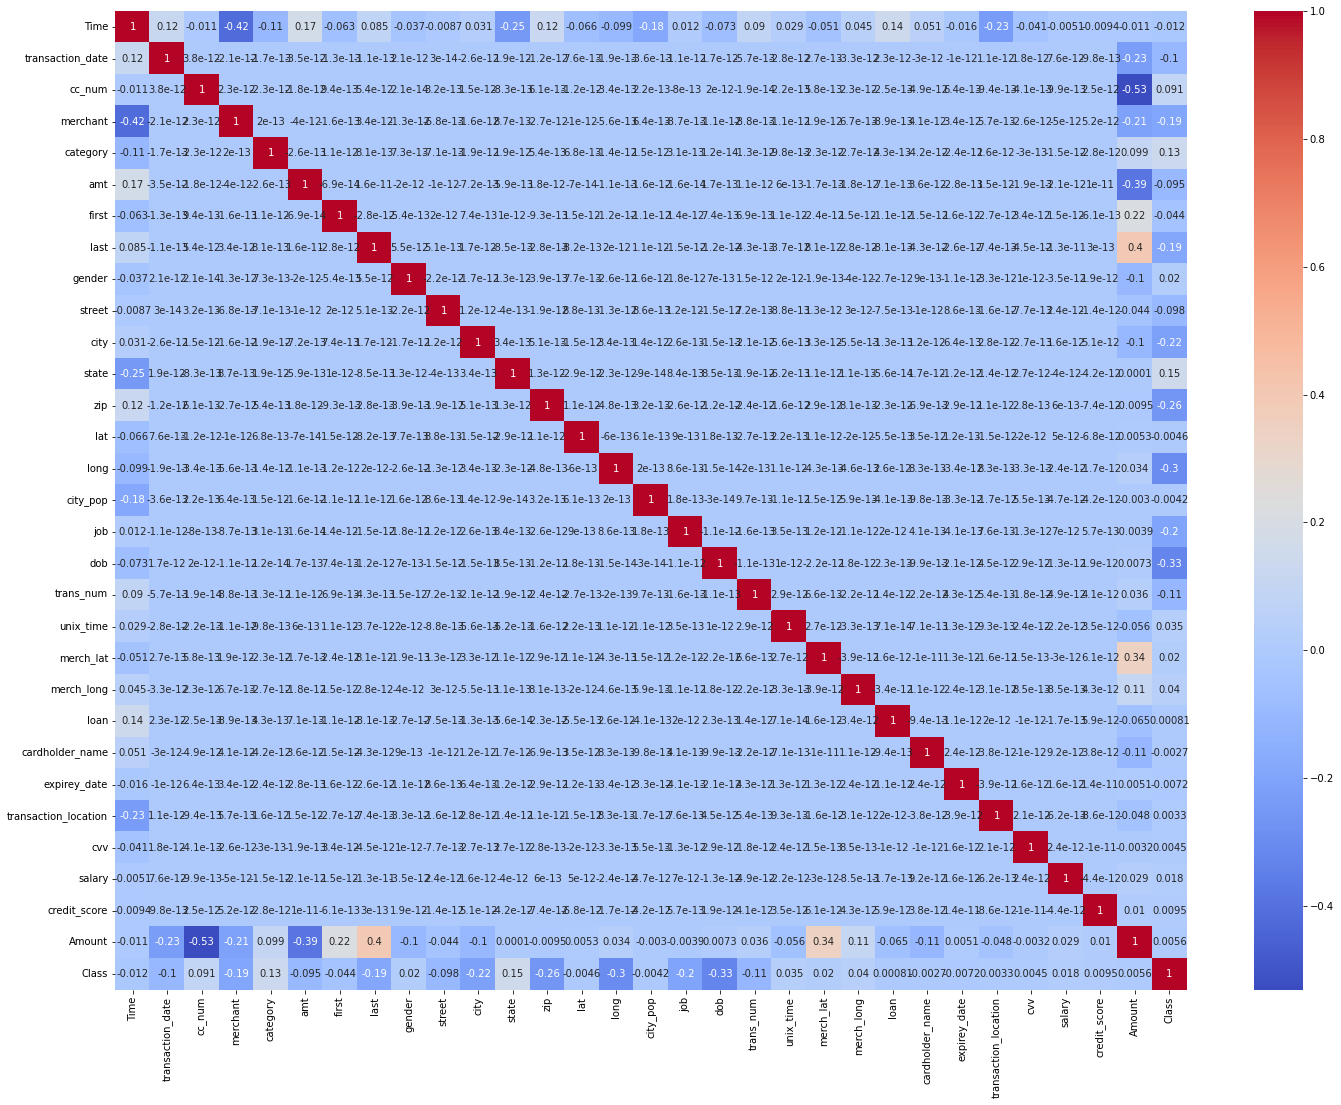

In [207]:
plt.figure(figsize=(24,18))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

In [208]:
Delta_Time=pd.to_timedelta(df['Time'],unit='s')

df['Time_hour']=(Delta_Time.dt.components.hours).astype(int)

df.drop('Time',axis=1,inplace=True)



In [209]:
df['Amount'] = df['Amount'].fillna(0)
df['Class'] = df['Class'].fillna(0)
X=df.drop(['Class'],axis=1)
y=df['Class']


In [210]:
X.head()

,transaction_date,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,loan,cardholder_name,expirey_date,transaction_location,cvv,salary,credit_score,Amount,Time_hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [211]:
np.any(np.isnan(X))
df.isnull().any()
# df[df['loan'].isna()]
# df[df['Amount'].isna()]

# df['Amount'] = df['Amount'].fillna(0)

transaction_date        False
cc_num                  False
merchant                False
category                False
amt                     False
first                   False
last                    False
gender                  False
street                  False
city                    False
state                   False
zip                     False
lat                     False
long                    False
city_pop                False
job                     False
dob                     False
trans_num               False
unix_time               False
merch_lat               False
merch_long              False
loan                    False
cardholder_name         False
expirey_date            False
transaction_location    False
cvv                     False
salary                  False
credit_score            False
Amount                  False
Class                   False
Time_hour               False
dtype: bool

In [212]:
df.loc[df.Amount == 0.0]
df.drop([243876], axis=0, inplace=True)

In [213]:
X.shape,y.shape

((284807, 30), (284807,))

In [214]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss


In [217]:
sm=RandomOverSampler(0.7)
X,y=sm.fit_resample(X,y)
# sm=RandomOverSampler(0.8)
# X_train,y_train=sm.fit_resample(X_train,y_train)

In [218]:
normal_records = df.Class == 0
fraud_records = df.Class == 1

In [ ]:
# #bar chart
# plt.figure(figsize=(7,5))
# sns.countplot(normal_records)
# plt.title("Class Count", fontsize=18)
# plt.xlabel("Record counts by class", fontsize=15)
# plt.ylabel("Count", fontsize=15)
# plt.show()


In [219]:
# Splitting the dataset using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [220]:
# Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

199020
159154
39866


In [221]:
cols=list(X.columns.values)

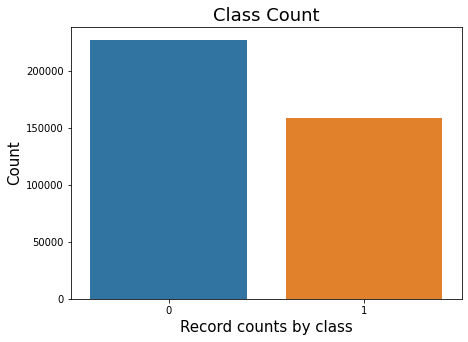

In [222]:
#bar chart
plt.figure(figsize=(7,5))
sns.countplot(y_train)
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()


In [ ]:
# # plot the histogram of a variable from the dataset to see the skewness
# normal_records = df.Class == 0
# fraud_records = df.Class == 1

# plt.figure(figsize=(20, 60))
# for n, col in enumerate(cols):
#   plt.subplot(10,3,n+1)
#   sns.distplot(X[col][normal_records], color='blue')
#   sns.distplot(X[col][fraud_records], color='red')
#   plt.title(col, fontsize=17)
# plt.show()

In [223]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

In [224]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [225]:
# # Created a common function to fit and predict on a Logistic Regression model for both L1 and L2
def buildAndRunLogisticModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )

  searchCV_l1.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_)

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_)  


  #find predicted vallues
  y_pred_l1 = searchCV_l1.predict(X_test)
  y_pred_l2 = searchCV_l2.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
    
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [226]:
# Created a common function to fit and predict on a KNN model
def buildAndRunKNNModels(df_Results,Methodology, X_train,y_train, X_test, y_test ):

  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [227]:
# Created a common function to fit and predict on a Tree models for both gini and entropy criteria
def buildAndRunTreeModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [228]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      2      3 ... 483330 483331 483333] TEST: [     1      4      9 ... 483316 483332 483334]
TRAIN: [     0      1      2 ... 483332 483333 483334] TEST: [    10     12     16 ... 483313 483324 483326]
TRAIN: [     1      2      4 ... 483332 483333 483334] TEST: [     0      3      7 ... 483328 483329 483331]
TRAIN: [     0      1      2 ... 483332 483333 483334] TEST: [     6      8     18 ... 483323 483327 483330]
TRAIN: [     0      1      3 ... 483331 483332 483334] TEST: [     2      5     17 ... 483321 483322 483333]
TRAIN: [     0      1      3 ... 483331 483333 483334] TEST: [     2      9     18 ... 483319 483325 483332]
TRAIN: [     0      1      2 ... 483332 483333 483334] TEST: [     6     12     15 ... 483321 483328 483329]
TRAIN: [     0      2      3 ... 483329 483331 483332] TEST: [     1      4     16 ... 483330 483333 483334]
TRAIN: [     0      1      2 ... 483332 483333 483334] TEST: [     5      7     13 ... 483326 483327 483331]
TRAIN: [     1     

In [ ]:
# #Run KNN Model
# print("KNN Model")
# start_time = time.time()
# df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
# print('-'*60)

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9996586218668212
Confusion Matrix


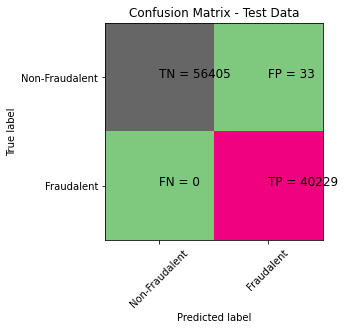

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56438
           1       1.00      1.00      1.00     40229

    accuracy                           1.00     96667
   macro avg       1.00      1.00      1.00     96667
weighted avg       1.00      1.00      1.00     96667

gini tree_roc_value: 0.9997076437861016
Tree threshold: 1.0
ROC for the test dataset 100.0%


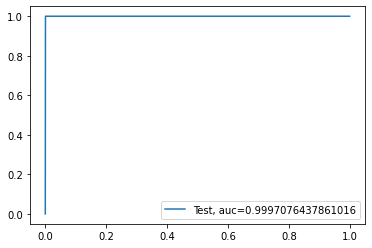

entropy score: 0.9998448281212824
Confusion Matrix


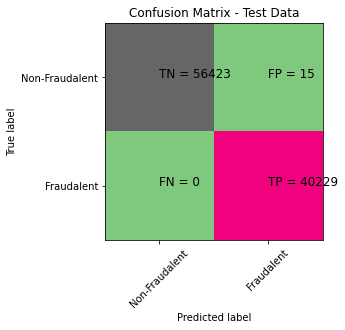

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56438
           1       1.00      1.00      1.00     40229

    accuracy                           1.00     96667
   macro avg       1.00      1.00      1.00     96667
weighted avg       1.00      1.00      1.00     96667

entropy tree_roc_value: 0.9998671108118644
Tree threshold: 1.0
ROC for the test dataset 100.0%


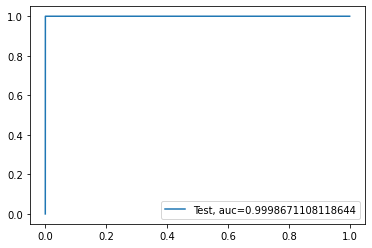

Time Taken by Model: --- 32.81491470336914 seconds ---
------------------------------------------------------------


In [232]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [ ]:
# #Run Logistic Regression with L1 And L2 Regularisation
# print("Logistic Regression with L1 And L2 Regularisation")
# start_time = time.time()
# df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
# print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
# print('-'*60 )